In [3]:
# import libraries
import tensorflow as tf
from utils.dataset import Dataset
from utils.visualisation import plotImages, plotWrongImages
from models.model import EfficientCapsNet

[INFO] Dataset loaded!


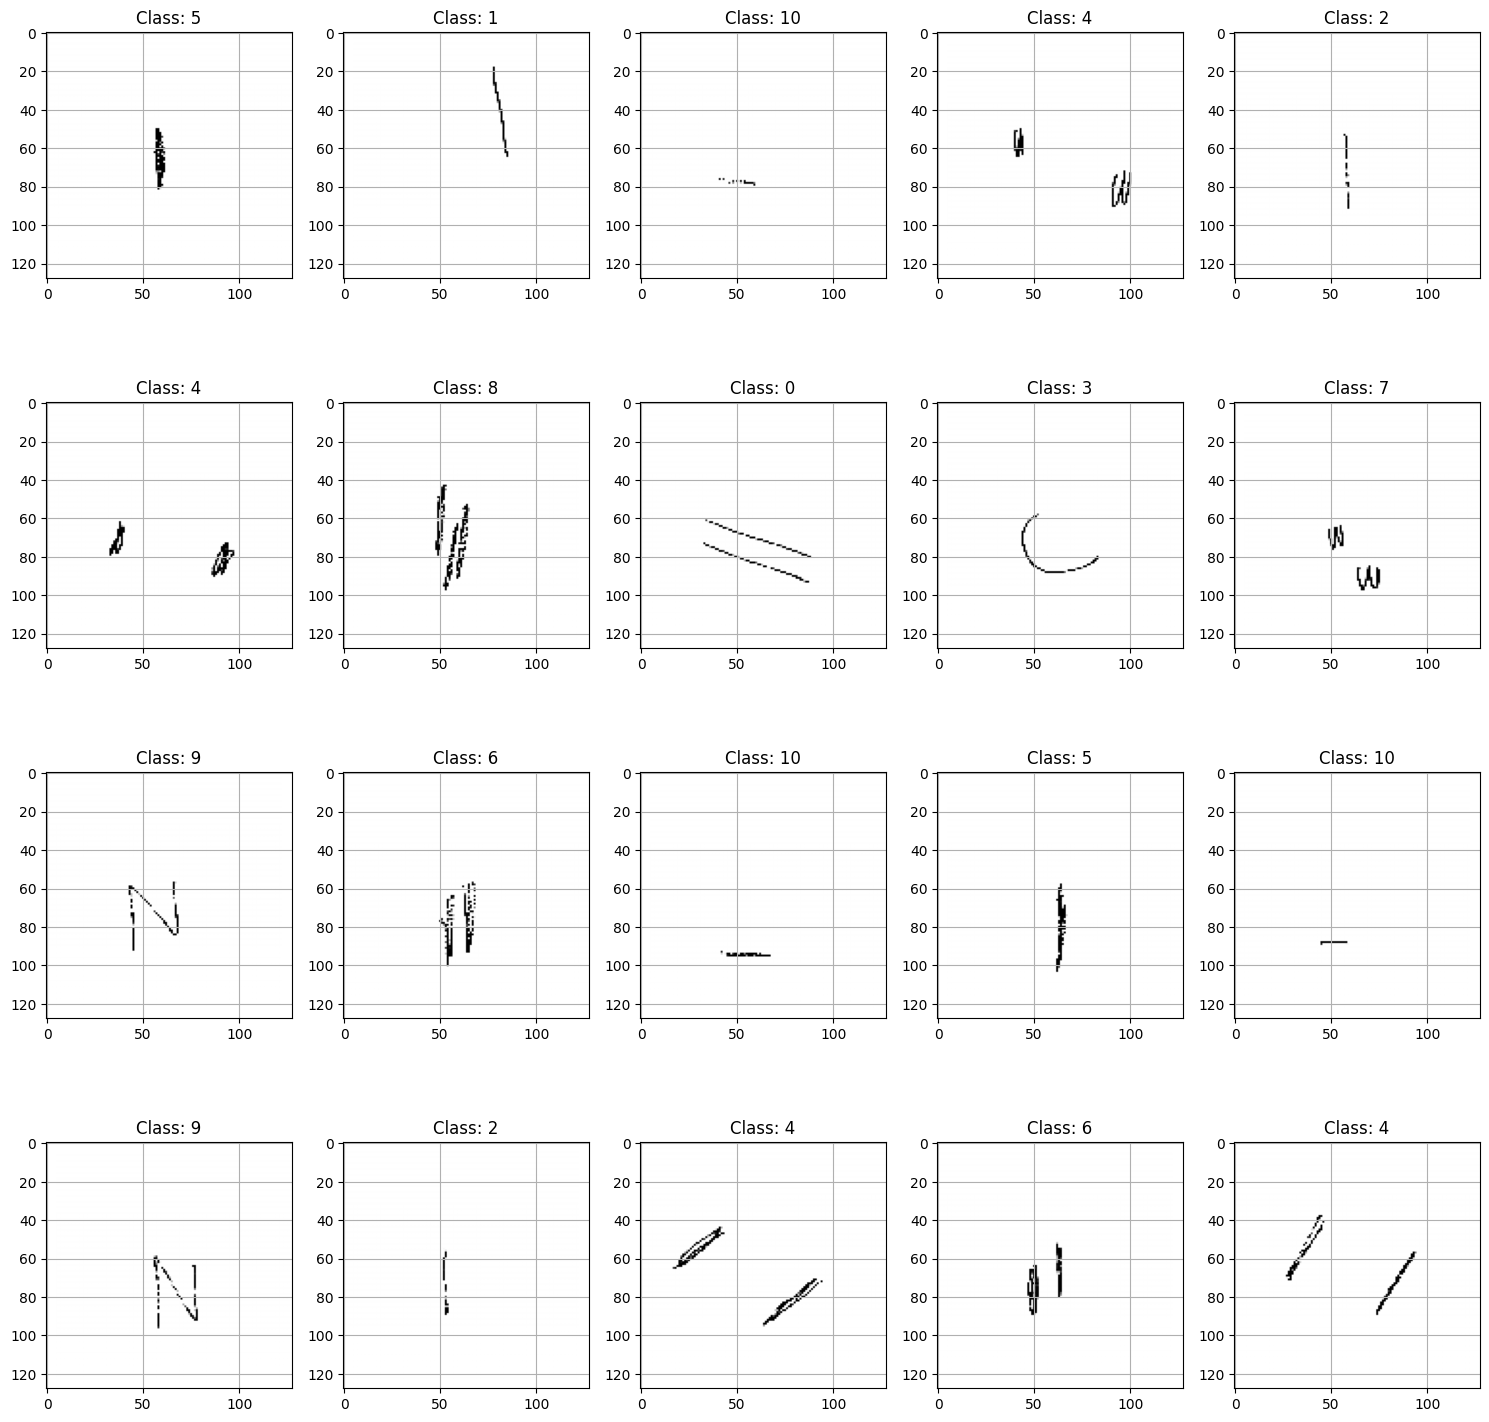

In [5]:
# dataset

dataset = Dataset(config_path='config_STSL.json')

n_images = 20 # number of images to be plotted
plotImages(dataset.X_test[:n_images,...,0], dataset.y_test[:n_images], n_images, dataset.class_names)

In [6]:
# Model

model_test = EfficientCapsNet(mode='test', verbose=True)

model_test.load_graph_weights() # load graph weights (bin folder)

Shape of x after first Conv2D: (None, 124, 124, 32)
Shape of x after second Conv2D: (None, 122, 122, 64)
Shape of x after third Conv2D: (None, 60, 60, 64)
Shape of x after fourth Conv2D: (None, 58, 58, 64)
Shape of x after fifth Conv2D: (None, 28, 28, 64)
Shape of x after sixth Conv2D: (None, 13, 13, 128)
Shape of x before PrimaryCaps: (None, 13, 13, 128)
Model: "Efficient_CapsNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 124, 124, 32)      832       
                                                                 
 batch_normalization (Batch  (None, 124, 124, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)   

In [7]:
# Test

model_test.evaluate(dataset.X_test, dataset.y_test) # if "smallnorb" use X_test_patch

------------------------------STSL Evaluation------------------------------
 2/11 [====>.........................] - ETA: 1s

2023-08-12 19:34:40.154066: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x29da7cd20 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2023-08-12 19:34:40.154092: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2023-08-12 19:34:40.169984: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


11/11 [==============================] - 1s 102ms/step
Test acc: 0.07951070336391437
Test error [%]: 92.0489%
N° misclassified images: 301 out of 327


11/11 [==============================] - 1s 100ms/step


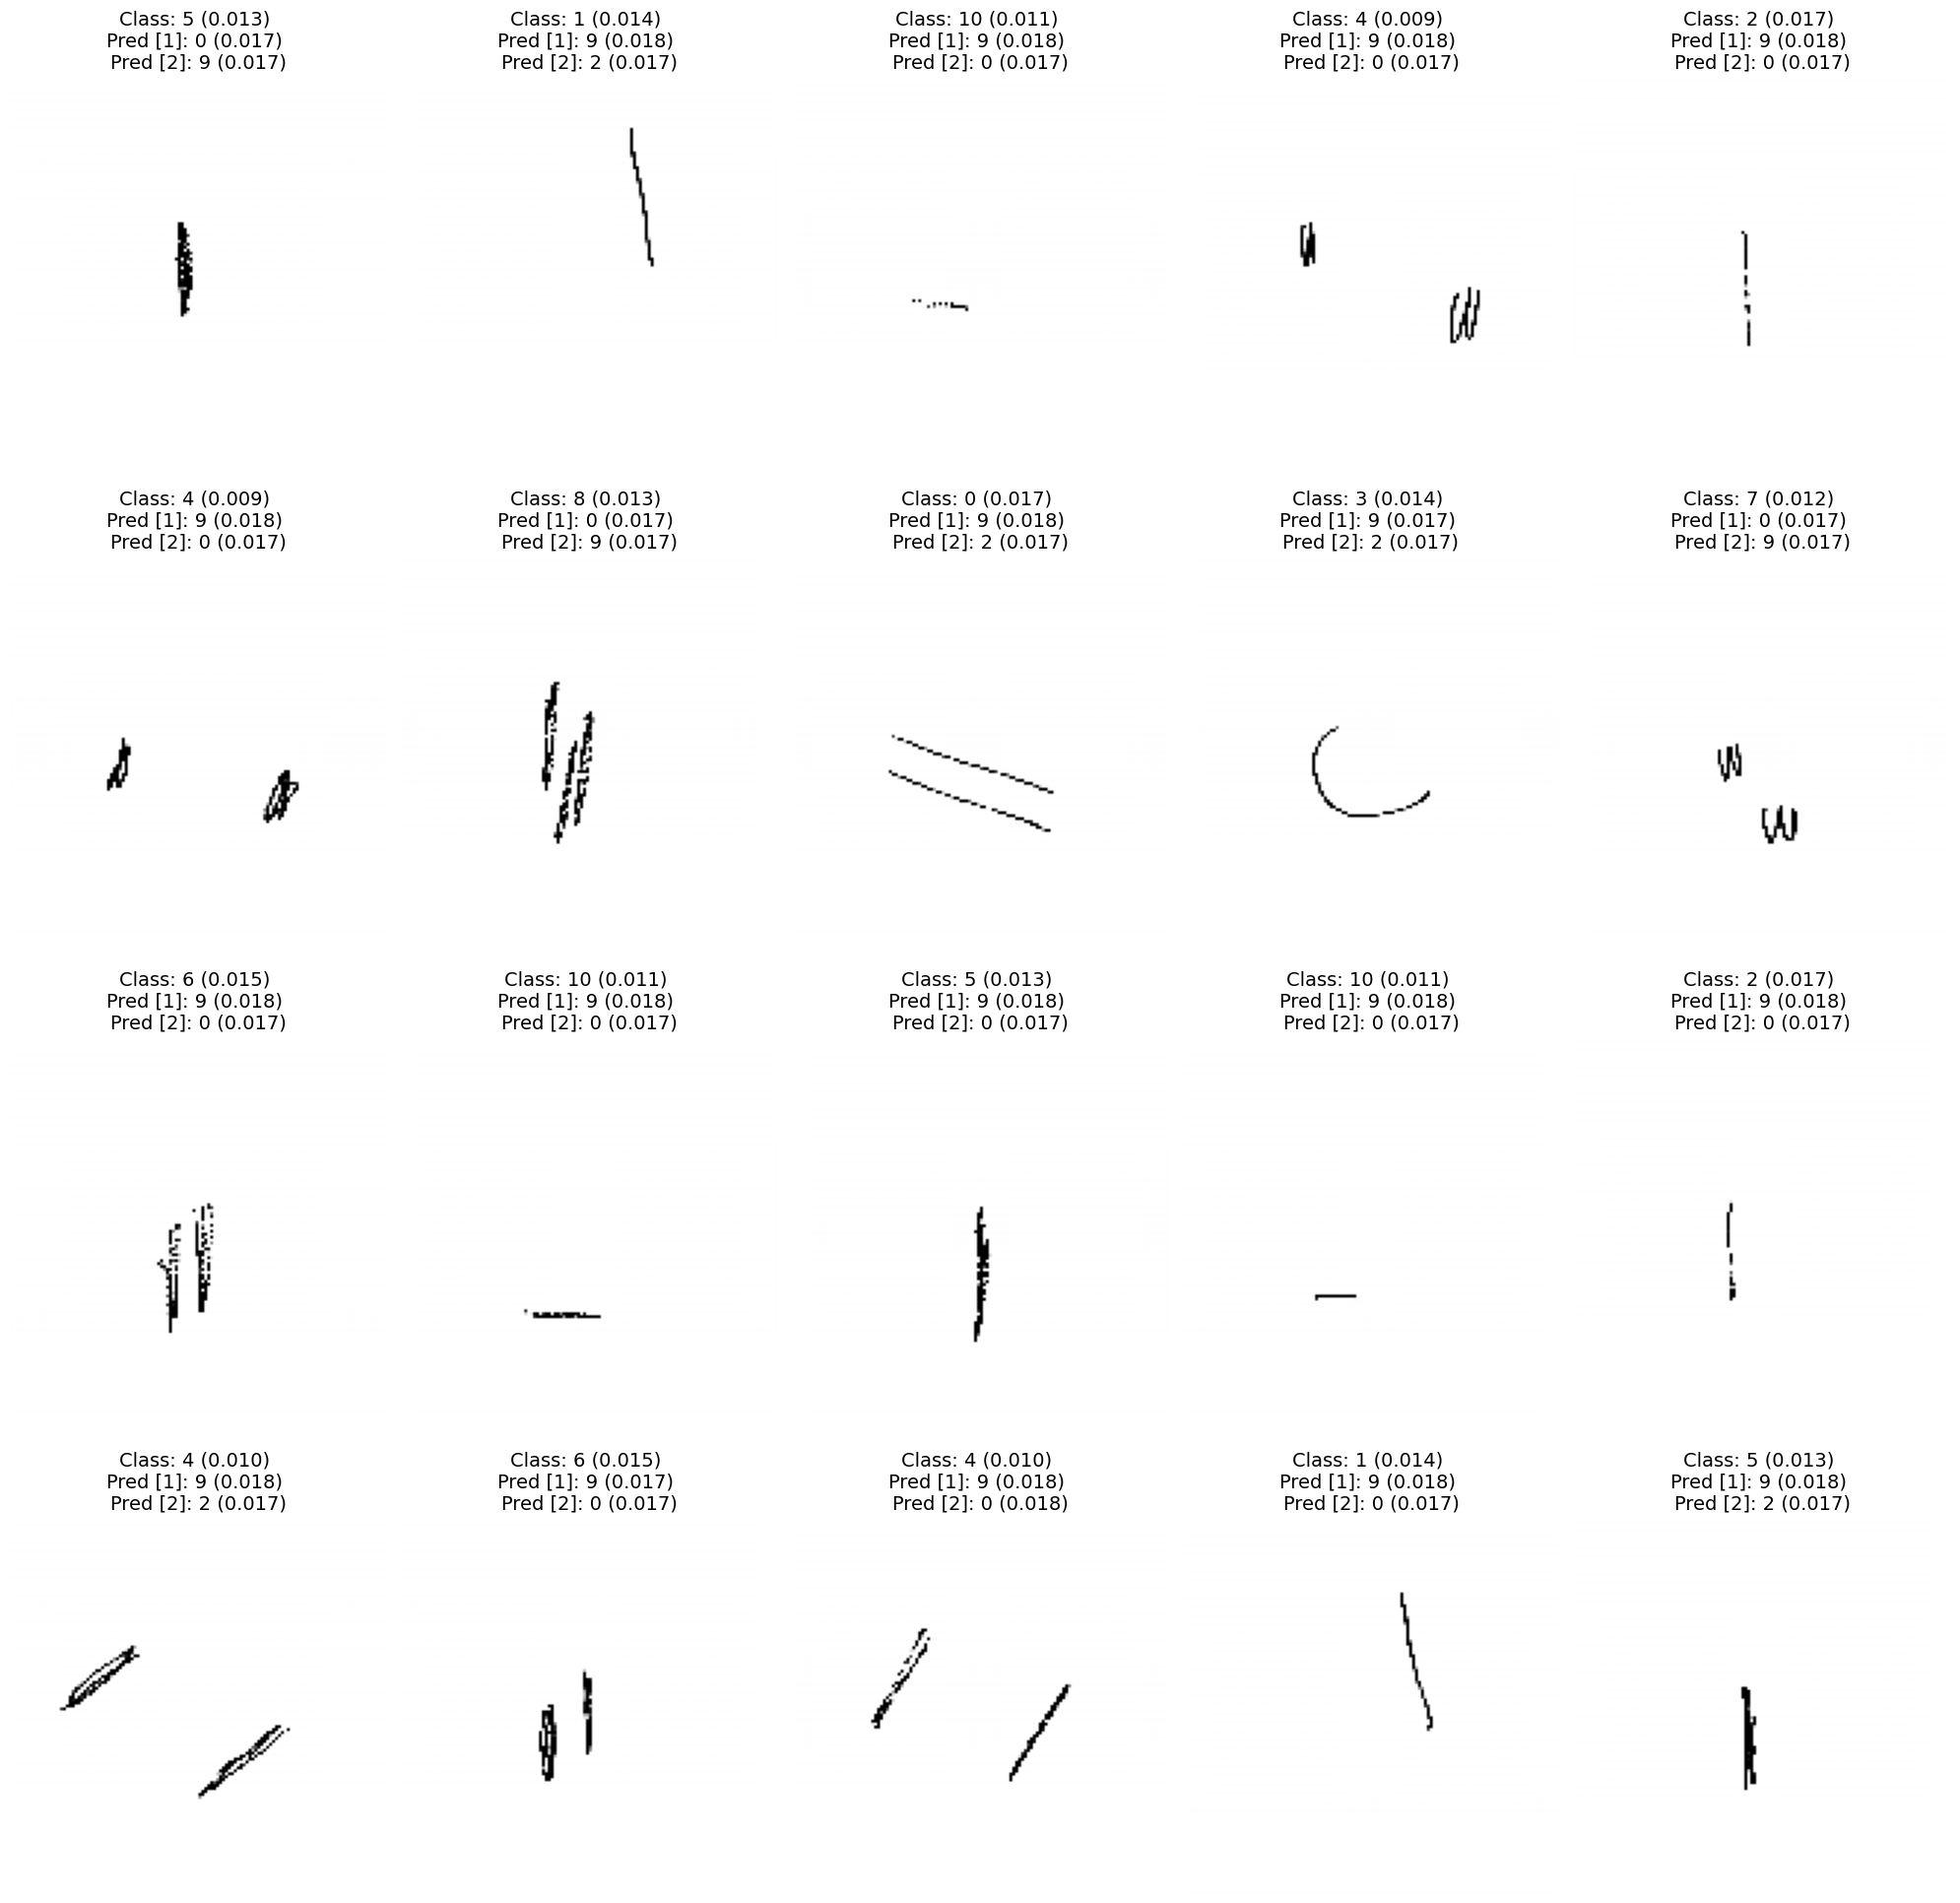

In [9]:
# Plot
y_pred = model_test.predict(dataset.X_test)[0]

n_images = 20
plotWrongImages(dataset.X_test, dataset.y_test, y_pred, 
                n_images, dataset.class_names)